In [1]:
import os
class_names = []
for dirs,subdirs,files in os.walk('PokemonData'):
    class_names.append(subdirs)

In [2]:
flat_class_names = [item for sublist in class_names for item in sublist]
flat_class_names

['Venusaur',
 'Lickitung',
 'Omastar',
 'Rattata',
 'Persian',
 'Porygon',
 'Nidorino',
 'Ninetales',
 'Seadra',
 'Golbat',
 'Abra',
 'Seel',
 'Raticate',
 'Venomoth',
 'Kangaskhan',
 'Gyarados',
 'Arbok',
 'Articuno',
 'Muk',
 'Primeape',
 'Flareon',
 'Clefable',
 'Kabutops',
 'Hitmonchan',
 'Dragonair',
 'Tentacool',
 'Hitmonlee',
 'Vulpix',
 'Dugtrio',
 'Jigglypuff',
 'Starmie',
 'Diglett',
 'Magneton',
 'Krabby',
 'Staryu',
 'Beedrill',
 'Koffing',
 'Grimer',
 'Venonat',
 'Jynx',
 'Marowak',
 'Charmeleon',
 'Machop',
 'Mew',
 'Chansey',
 'Ekans',
 'Electrode',
 'Victreebel',
 'Weezing',
 'Doduo',
 'Sandslash',
 'Dratini',
 'Blastoise',
 'Metapod',
 'Alakazam',
 'Psyduck',
 'Magnemite',
 'Rhyhorn',
 'Zubat',
 'Dragonite',
 'Caterpie',
 'Machamp',
 'Tauros',
 'Kakuna',
 'Squirtle',
 'MrMime',
 'Eevee',
 'Pidgey',
 'Kabuto',
 'Butterfree',
 'Tangela',
 'Omanyte',
 'Graveler',
 'Snorlax',
 'Clefairy',
 'Nidoking',
 'Bellsprout',
 'Vaporeon',
 'Pidgeot',
 'Machoke',
 'Cubone',
 'Arcanin

In [3]:
import tensorflow as tf 

2022-02-06 06:05:50.401498: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-06 06:05:50.401524: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
batch_size = 16
img_height = 180
img_width = 180
data_dir = 'PokemonData/'

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6820 files belonging to 150 classes.
Using 5456 files for training.


2022-02-06 06:05:54.899161: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-06 06:05:54.899208: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-06 06:05:54.899231: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost): /proc/driver/nvidia/version does not exist
2022-02-06 06:05:54.900678: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6820 files belonging to 150 classes.
Using 1364 files for validation.


In [7]:
class_names = train_ds.class_names

2022-02-06 06:05:56.326170: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


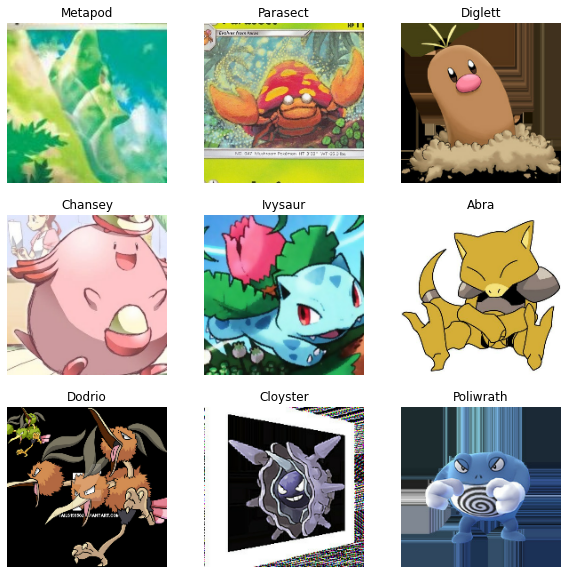

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
base_model = tf.keras.applications.efficientnet.EfficientNetB1(
    include_top=False,
)

In [11]:
base_model.trainable = False

In [12]:
for layer in base_model.layers[-10:]:
    layer.trainable = True

In [13]:
# Creating the Model

top = tf.keras.Input(shape=(180, 180, 3))
x = base_model(top)
x = tf.keras.layers.GlobalMaxPooling2D()(x)
bottom = tf.keras.layers.Dense(150,activation='softmax')(x)

# Generate model

model_1 = tf.keras.Model(top,bottom)

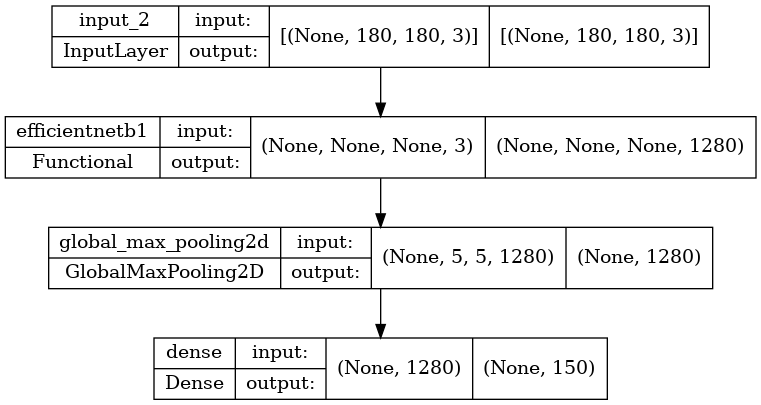

In [14]:
tf.keras.utils.plot_model(model_1,show_shapes=True)

In [15]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 efficientnetb1 (Functional)  (None, None, None, 1280)  6575239  
                                                                 
 global_max_pooling2d (Globa  (None, 1280)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 150)               192150    
                                                                 
Total params: 6,767,389
Trainable params: 192,150
Non-trainable params: 6,575,239
_________________________________________________________________


In [16]:
# Compile model
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [17]:
early_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    verbose=0,
    mode="auto",
    restore_best_weights=True,
)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs', histogram_freq=1)

In [18]:
history_1 = model_1.fit(
    train_ds,
    epochs=25,
    validation_data=val_ds,
    callbacks = [early_callback,tensorboard_callback]
)

Epoch 1/25


2022-02-06 06:06:10.619561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


119/341 [=========>....................] - ETA: 1:19 - loss: 7.6197 - accuracy: 0.0777

2022-02-06 06:06:54.117487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


130/341 [==========>...................] - ETA: 1:16 - loss: 7.4232 - accuracy: 0.0856

2022-02-06 06:06:58.190156: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


152/341 [============>.................] - ETA: 1:08 - loss: 7.0494 - accuracy: 0.1044

2022-02-06 06:07:06.128329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


273/341 [=======================>......] - ETA: 22s - loss: 5.7852 - accuracy: 0.1882

2022-02-06 06:07:42.737389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


284/341 [=======================>......] - ETA: 18s - loss: 5.6968 - accuracy: 0.1959

2022-02-06 06:07:45.695969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


341/341 [==============================] - ETA: 0s - loss: 5.3082 - accuracy: 0.2273

2022-02-06 06:08:16.994648: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


341/341 [==============================] - 144s 400ms/step - loss: 5.3082 - accuracy: 0.2273 - val_loss: 2.8198 - val_accuracy: 0.4831
Epoch 2/25
341/341 [==============================] - 112s 328ms/step - loss: 1.6814 - accuracy: 0.6252 - val_loss: 2.1334 - val_accuracy: 0.5968
Epoch 3/25
341/341 [==============================] - 113s 331ms/step - loss: 0.8502 - accuracy: 0.7879 - val_loss: 2.2038 - val_accuracy: 0.6151
Epoch 4/25
341/341 [==============================] - 112s 327ms/step - loss: 0.5708 - accuracy: 0.8468 - val_loss: 1.9357 - val_accuracy: 0.6569
Epoch 5/25
341/341 [==============================] - 112s 329ms/step - loss: 0.4168 - accuracy: 0.8906 - val_loss: 2.1121 - val_accuracy: 0.6415
Epoch 6/25
341/341 [==============================] - 113s 331ms/step - loss: 0.3480 - accuracy: 0.9065 - val_loss: 1.7657 - val_accuracy: 0.6987
Epoch 7/25
341/341 [==============================] - 113s 332ms/step - loss: 0.3126 - accuracy: 0.9197 - val_loss: 1.7517 - val_accura

In [19]:
model_1.evaluate(val_ds)


86/86 [==============================] - 22s 255ms/step - loss: 1.7517 - accuracy: 0.7053


[1.751704454421997, 0.7052785754203796]

In [20]:
model_1.save("efficientnetv1")

2022-02-06 06:27:51.329888: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: efficientnetv1/assets


In [22]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('efficientnetv1') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model_01.tflite', 'wb') as f:
  f.write(tflite_model)

2022-02-06 06:31:46.005798: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-02-06 06:31:46.005853: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2022-02-06 06:31:46.008859: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: efficientnetv1
2022-02-06 06:31:46.137380: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2022-02-06 06:31:46.137698: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: efficientnetv1
2022-02-06 06:31:46.557617: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-02-06 06:31:47.617433: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: efficientnetv1
2022-02-06 06:31:48.149524: I tensorflow/cc/saved_model/loader.cc:301] SavedModel load for tags { serve }; Status: success: OK. Took 2140668 micro

In [23]:
class_names

['Abra',
 'Aerodactyl',
 'Alakazam',
 'Alolan Sandslash',
 'Arbok',
 'Arcanine',
 'Articuno',
 'Beedrill',
 'Bellsprout',
 'Blastoise',
 'Bulbasaur',
 'Butterfree',
 'Caterpie',
 'Chansey',
 'Charizard',
 'Charmander',
 'Charmeleon',
 'Clefable',
 'Clefairy',
 'Cloyster',
 'Cubone',
 'Dewgong',
 'Diglett',
 'Ditto',
 'Dodrio',
 'Doduo',
 'Dragonair',
 'Dragonite',
 'Dratini',
 'Drowzee',
 'Dugtrio',
 'Eevee',
 'Ekans',
 'Electabuzz',
 'Electrode',
 'Exeggcute',
 'Exeggutor',
 'Farfetchd',
 'Fearow',
 'Flareon',
 'Gastly',
 'Gengar',
 'Geodude',
 'Gloom',
 'Golbat',
 'Goldeen',
 'Golduck',
 'Golem',
 'Graveler',
 'Grimer',
 'Growlithe',
 'Gyarados',
 'Haunter',
 'Hitmonchan',
 'Hitmonlee',
 'Horsea',
 'Hypno',
 'Ivysaur',
 'Jigglypuff',
 'Jolteon',
 'Jynx',
 'Kabuto',
 'Kabutops',
 'Kadabra',
 'Kakuna',
 'Kangaskhan',
 'Kingler',
 'Koffing',
 'Krabby',
 'Lapras',
 'Lickitung',
 'Machamp',
 'Machoke',
 'Machop',
 'Magikarp',
 'Magmar',
 'Magnemite',
 'Magneton',
 'Mankey',
 'Marowak',
 '